# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

def one_sample_ttest(sample, popmean, alpha):
    """
    Performs a one-sample t-test and visualizes the distribution for normality.

    Parameters:
    - sample: array-like, the sample data
    - popmean: float, the population mean to compare against
    - alpha: float, significance level (e.g., 0.05)

    Returns:
    - t_stat: calculated t-statistic
    - critical_t: critical t-value at given alpha
    - p_value: calculated p-value
    - is_significant: boolean, True if results are significant, False otherwise
    """
    # Visualize sample distribution for normality
    plt.figure(figsize=(10, 6))
    sns.histplot(sample, kde=True, color='blue', bins=10, label='Sample Distribution')
    plt.axvline(np.mean(sample), color='red', linestyle='--', label='Sample Mean')
    plt.title('Sample Distribution with KDE', fontsize=16)
    plt.xlabel('Scores', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend()
    plt.show()
    
    # Population mean
    print(f"Population Mean: {popmean}")

    # Sample mean and standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    print(f"Sample Mean: {sample_mean:.2f}, Sample Std Dev: {sample_std:.2f}")

    # Degrees of freedom
    n = len(sample)
    df = n - 1
    print(f"Degrees of Freedom: {df}")

    # Critical t-value
    critical_t = stats.t.ppf(1 - alpha / 2, df)
    print(f"Critical T-Value: ±{critical_t:.2f}")

    # Calculate t-statistic and p-value
    t_stat, p_value = stats.ttest_1samp(sample, popmean)
    print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

    # Determine if the result is significant
    is_significant = p_value < alpha
    if is_significant:
        print(f"Result: Significant at α = {alpha}. Reject the null hypothesis.")
    else:
        print(f"Result: Not significant at α = {alpha}. Fail to reject the null hypothesis.")
    
    return t_stat, critical_t, p_value, is_significant


### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

Analysis for Original Scores:


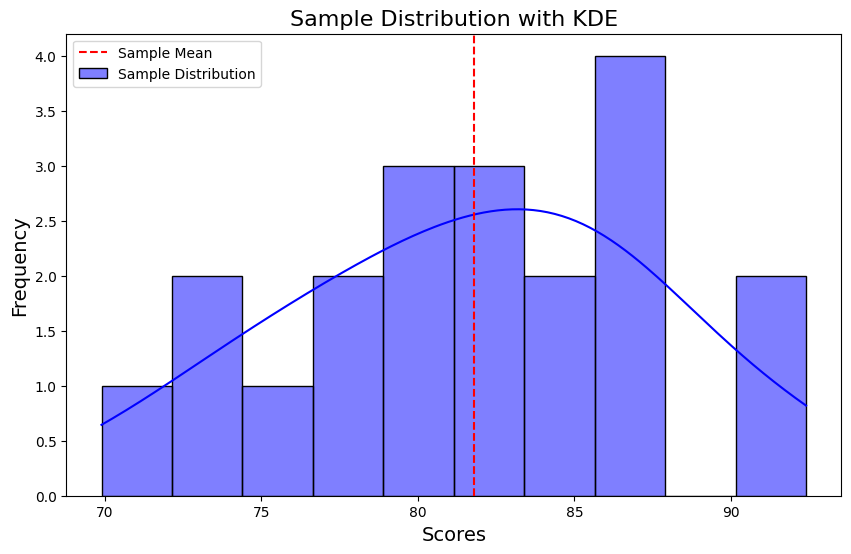

Population Mean: 65
Sample Mean: 81.80, Sample Std Dev: 5.92
Degrees of Freedom: 19
Critical T-Value: ±2.09
T-Statistic: 12.69, P-Value: 0.0000
Result: Significant at α = 0.05. Reject the null hypothesis.


In [4]:
# Sample data
sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
population_mean = 65
alpha = 0.05

# Perform one-sample t-test
print("Analysis for Original Scores:")
t_stat, critical_t, p_value, is_significant = one_sample_ttest(sample_scores, population_mean, alpha)



Analysis for Corrected Scores:


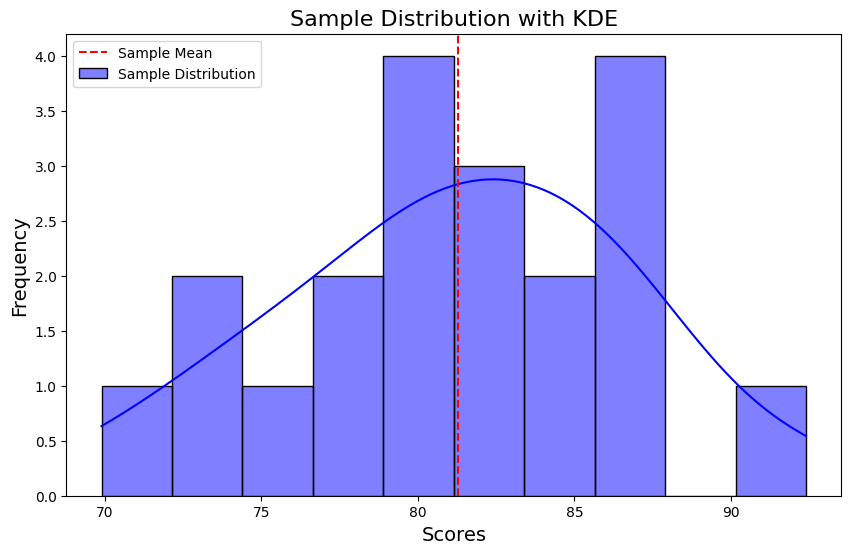

Population Mean: 65
Sample Mean: 81.30, Sample Std Dev: 5.52
Degrees of Freedom: 19
Critical T-Value: ±2.09
T-Statistic: 13.20, P-Value: 0.0000
Result: Significant at α = 0.05. Reject the null hypothesis.


In [5]:
# Correct the incorrect score
corrected_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                    78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

# Perform one-sample t-test with corrected scores
print("\nAnalysis for Corrected Scores:")
t_stat_corrected, critical_t_corrected, p_value_corrected, is_significant_corrected = one_sample_ttest(corrected_scores, population_mean, alpha)



In [6]:
# Calculate Cohen's d for original sample
sample_mean = np.mean(sample_scores)
sample_std = np.std(sample_scores, ddof=1)
cohens_d = (sample_mean - population_mean) / sample_std
print(f"\nCohen's d for Original Sample: {cohens_d:.2f}")

# Interpret Cohen's d
if abs(cohens_d) < 0.2:
    effect_size_interpretation = "small"
elif abs(cohens_d) < 0.5:
    effect_size_interpretation = "medium"
else:
    effect_size_interpretation = "large"
print(f"Effect Size Interpretation: {effect_size_interpretation} effect")



Cohen's d for Original Sample: 2.84
Effect Size Interpretation: large effect


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 